In [1]:
%matplotlib inline

import json
import os
import pickle

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from tqdm import tqdm as loadingbar

In [3]:
from Datasets import MoNuSeg, CellCrops
import mrcnn

In [4]:
model = torch.load("/workspaces/dev-container/ML-Unsupervised/mrcnn/model-epochs-90-cpu.model", map_location='cpu')
model.eval()
model = mrcnn.model.MyModel(model)

In [5]:
cell_crop_dir_all = "/workspaces/dev-container/testing/data/CellCrops/"
cell_crop_dir = os.path.join(cell_crop_dir_all, "eosinophil")
cell_crops = os.listdir(cell_crop_dir)
cell_crops.sort()
def load_cell_crop(filepath):
    if cell_crop_dir_all not in filepath:
        raise Exception(filepath)
    img = Image.open(filepath)
    img = transforms.ToTensor()(img)
    return img

In [6]:
cell_crop_num = 0
cell_crop_path = os.path.join(cell_crop_dir, cell_crops[cell_crop_num])
print(cell_crop_path)
img = load_cell_crop(cell_crop_path)
padded_img, unpadder = CellCrops.get_padded_cell_crop_and_unpadder(img)
predictions = model.get_predictions(padded_img)
best_instance = predictions[0]

/workspaces/dev-container/testing/data/CellCrops/eosinophil/10198.jpg


/opt/conda/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180549130/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


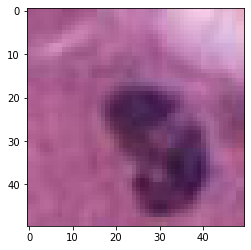

In [8]:
plt.imshow(MoNuSeg.util.correct_axes(img))

In [ ]:
test_mask = predictions.masks[0,0].mul(255).byte()
len(np.unique(test_mask))
plt.imshow(test_mask)

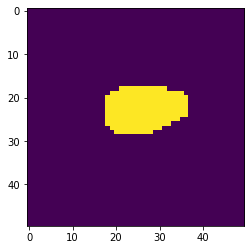

In [10]:
threshold = 0.1 * 255
plt.imshow(unpadder(best_instance.mask >= threshold))

In [ ]:
n = 5
print(predictions.scores[:n])
print(predictions.boxes[:n])

In [ ]:
#eocells_path = os.path.join(cell_crop_dir_all, "eosinophil")
#neutrocells_path = os.path.join(cell_crop_dir_all, "neutrophil")
#eocells = os.listdir(eocells_path)
#neutrocells = os.listdir(neutrocells_path)
#eocells.sort()
#neutrocells.sort()
#output_dir = os.path.join(cell_crop_dir_all, "masks", "mrcnn")
#if not os.path.isdir(output_dir): os.mkdir(output_dir)
#
#threshold = 0.1 * 255
#
#for eocell in loadingbar(eocells):
#    break
#    eocell_path = os.path.join(eocells_path, eocell)
#    img = transforms.ToTensor()(Image.open(eocell_path))
#    padded_img, unpadder = CellCrops.get_padded_cell_crop_and_unpadder(img)
#    predictions = get_predictions(padded_img)
#    prediction_mask = unpadder(predictions[0])
#    prediction_score = predictions.get_scores()[0]
#    prediction_path = f"eocell-{eocell.split('.')[0]}-{'{:4.4f}'.format(prediction_score)}.png"
#    cv.imwrite(os.path.join(output_dir, prediction_path), (prediction_mask >= threshold).astype(int) * 255)
#
#for neutrocell in loadingbar(neutrocells):
#    neutrocell_path = os.path.join(neutrocells_path, neutrocell)
#    img = transforms.ToTensor()(Image.open(neutrocell_path))
#    padded_img, unpadder = CellCrops.get_padded_cell_crop_and_unpadder(img)
#    predictions = get_predictions(padded_img)
#    prediction_mask = unpadder(predictions[0])
#    prediction_score = predictions.get_scores()[0]
#    prediction_path = f"neutrocell-{neutrocell.split('.')[0]}-{'{:4.4f}'.format(prediction_score)}.png"
#    cv.imwrite(os.path.join(output_dir, prediction_path), (prediction_mask >= threshold).astype(int) * 255)